# Solution diagnostics

This notebook demonstrates a way to debug a solution's optimization. These are the main visauls that `recommend.solution` provides for diagnostics:
* `plot_best_trajectory`
* `plot_convergence_evolution`
* `plot_penalties`

Those are just wrappers around `optimzer.plotting`. One can refer to it's docs to learn more about the visuals. We'll provide a quick summary based on a single example.

## Setup

In [1]:
# Resolve path when used in a usecase project
import sys
from pathlib import Path

sys.path.insert(0, str(Path("../../").resolve()))

In [2]:
import recommend
print(f'Using {recommend.__version__} version of recommend package')

Using 0.23.0 version of recommend package


In [3]:
from recommend import datasets as recommend_datasets

solutions = recommend_datasets.get_sample_solutions()
solution = solutions[62]  # pick any row from the dataset to visualise

<div class="alert alert-warning">
<b>Note</b>

Each of the plotting function has a requirement for `solution.loggers`. You have to pass this logger(s) to `optimize` function to create a solution with such a logger. As you can see, our sample solutions were created with several different loggers.

</div>

In [4]:
solution.loggers

[BestTrajectoryLogger(...), PenaltyLogger(...), BasicLogger(...)]

## `plot_best_trajectory`

This best trajectory summary shows us:
1. Objective evolution
2. Controls' domain evolution from which here we can see if our controls reach bound and which one: lower or upper.
3. Slack (additional distance of the `InequalityConstrain` to its bound)
4. Penalty value added to the objective

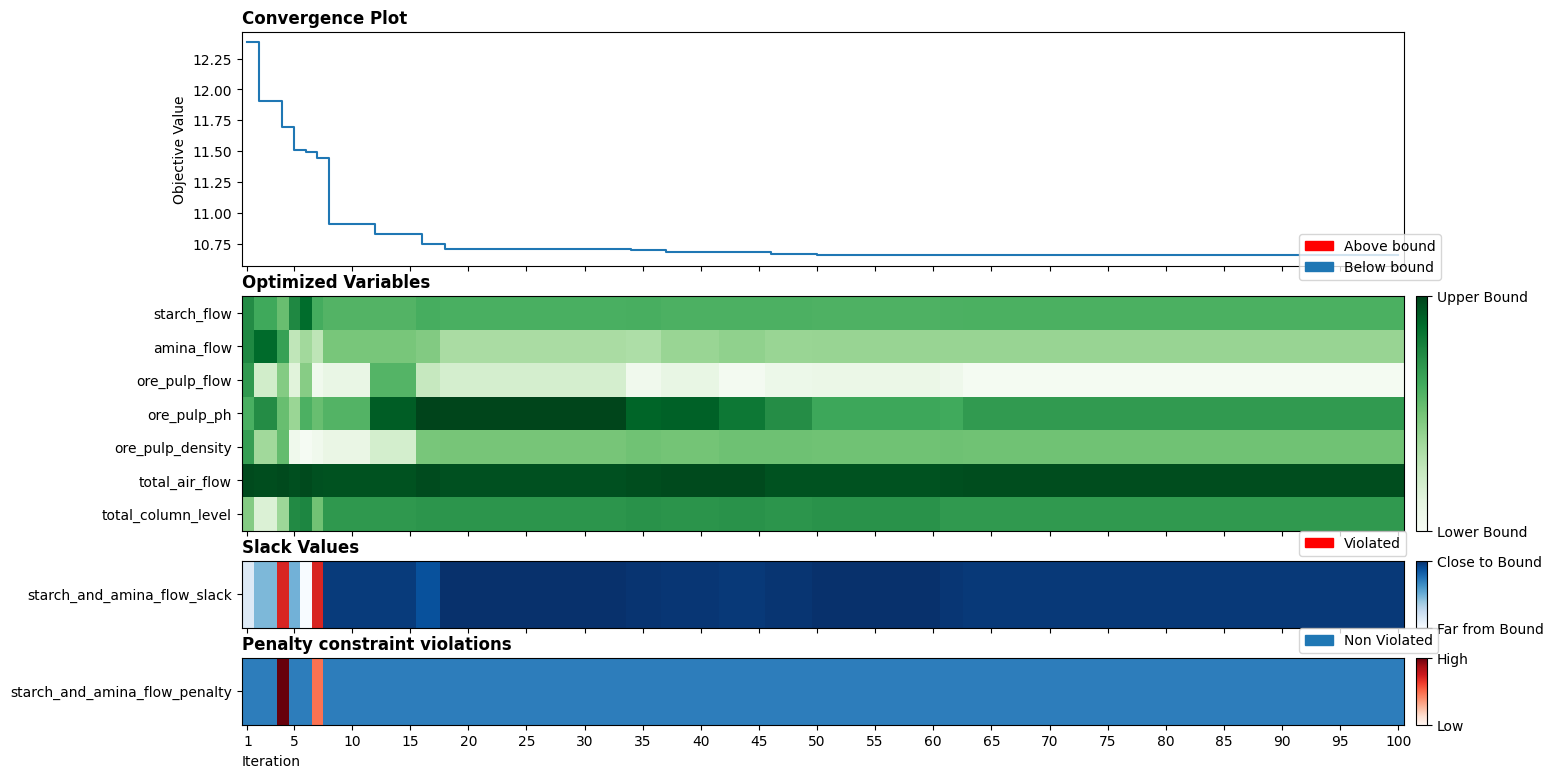

In [5]:
from recommend.solution import plot_best_trajectory_summary

fig = plot_best_trajectory_summary(solution)

## `plot_convergence_evolution`

This convergance plot shows us the best seen objective evolution as well as objective's distribution improvement through optimization.

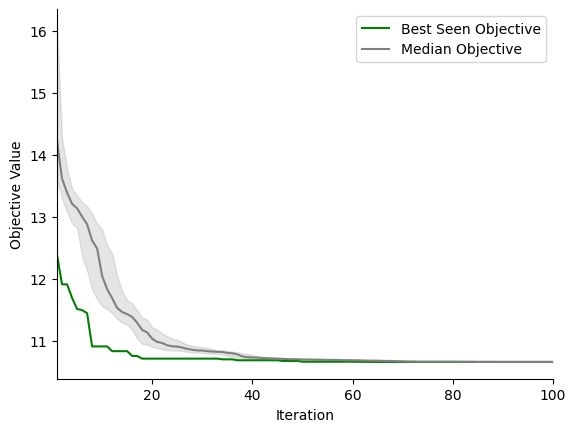

In [6]:
from recommend.solution import plot_convergence_evolution

fig = plot_convergence_evolution(solution)
fig

## `plot_penalties`

This penalties plot shows us the each penalties' mean value evolution
through optimization.

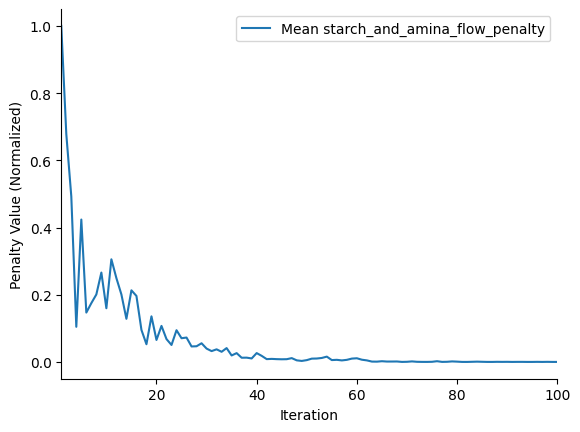

In [7]:
from recommend.solution import plot_penalties

fig = plot_penalties(solution)
fig